In [458]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

# importing Data set

In [459]:
cars=pd.read_csv('D:\FCAI-Y4\ML\Assignment 1\car_data.csv')

In [460]:
cars.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# scatter plots

In [463]:
cars.corr()["price"].sort_values()

highwaympg         -0.697599
citympg            -0.685751
ID                 -0.109093
peakrpm            -0.085267
symboling          -0.079978
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

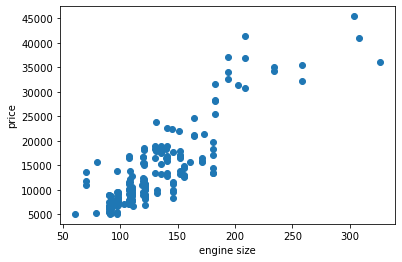

In [464]:
x=cars.enginesize
b=cars.carwidth
c=cars.horsepower
d=cars.curbweight
target=cars.price


plt.xlabel("engine size")
plt.ylabel("price")
plt.scatter(x,target)
plt.show()

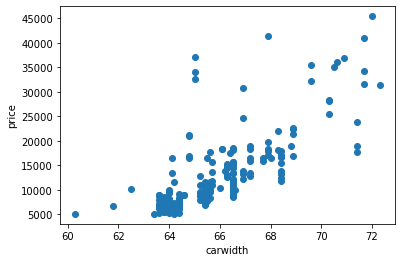

In [465]:
plt.xlabel("carwidth")
plt.ylabel("price")
plt.scatter(b,target)
plt.show()

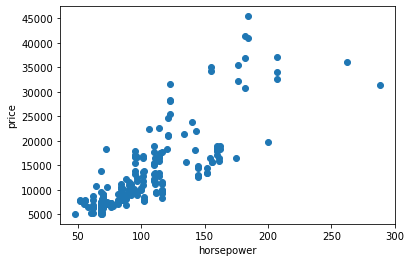

In [466]:
plt.xlabel("horsepower")
plt.ylabel("price")
plt.scatter(c,target)
plt.show()

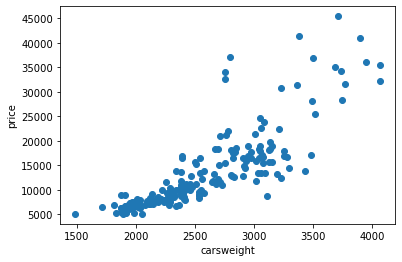

In [468]:
plt.xlabel("carsweight")
plt.ylabel("price")
plt.scatter(d,target)
plt.show()

In [469]:
cars=cars[['carwidth','horsepower','curbweight','enginesize','price']]

cars.head()

,carwidth,horsepower,curbweight,enginesize,price
0,64.1,111,2548,130,13495.0
1,64.1,111,2548,130,16500.0
2,65.5,154,2823,152,16500.0
3,66.2,102,2337,109,13950.0
4,66.4,115,2824,136,17450.0


# normalizing Data

In [470]:
df = cars.drop('price', axis=1)
df_norm = (df-df.min())/(df.max()-df.min())
df_norm = pd.concat((df_norm, cars.price), 1)
df_norm.head()


C:\Users\ADHAM\AppData\Local\Temp\ipykernel_10936\1010466477.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_norm = pd.concat((df_norm, cars.price), 1)


,carwidth,horsepower,curbweight,enginesize,price
0,0.316667,0.262500,0.411171,0.260377,13495.0
1,0.316667,0.262500,0.411171,0.260377,16500.0
2,0.433333,0.441667,0.517843,0.343396,16500.0
3,0.491667,0.225000,0.329325,0.181132,13950.0
4,0.508333,0.279167,0.518231,0.283019,17450.0


In [471]:
df = cars.drop('price', axis=1)
df_norm = (df-df.min())/(df.max()-df.min())
df_norm = pd.concat((df_norm, cars.price), 1)
df_norm.head()


C:\Users\ADHAM\AppData\Local\Temp\ipykernel_10936\1010466477.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_norm = pd.concat((df_norm, cars.price), 1)


,carwidth,horsepower,curbweight,enginesize,price
0,0.316667,0.262500,0.411171,0.260377,13495.0
1,0.316667,0.262500,0.411171,0.260377,16500.0
2,0.433333,0.441667,0.517843,0.343396,16500.0
3,0.491667,0.225000,0.329325,0.181132,13950.0
4,0.508333,0.279167,0.518231,0.283019,17450.0


# Splitting Data set into training and testing sets

In [472]:
#Defined X value and y value , and split the data train
#X = df_norm.drop(columns="price")           
y = df_norm["price"]    # y = pXice
X = df_norm["horsepower"] 
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [473]:
xxx=X_train.to_numpy()
yyy=y_train.to_numpy()

In [474]:
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (143,)
X Test  :  (62,)
Y Train :  (143,)
Y Test  :  (62,)


# linear regression 

In [485]:
# Implementation of gradient descent in linear regression
import numpy as np
import matplotlib.pyplot as plt

class Linear_Regression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.b = [0, 0]

    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        Y = self.Y
        m = len(Y) 
        self.b[0] = self.b[0] - (learning_rate * ((1/m) * np.sum(Y_pred - Y)))

        self.b[1] = self.b[1] - (learning_rate * ((1/m) * np.sum((Y_pred - Y) * self.X)))

    def predict(self, X=[]):
        Y_pred = np.array([])
        if not X: X = self.X
        b = self.b
        for x in X:
            Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

        return Y_pred

    def get_current_accuracy(self, Y_pred):
        p, e = Y_pred, self.Y
        n = len(Y_pred)
        return 1-sum(
            [
                abs(p[i]-e[i])/e[i]
                for i in range(n)
                if e[i] != 0]
)/n

#def predict(self, b, yi):

    def compute_cost(self, Y_pred):
        m = len(self.Y)
        J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
        return J

    def plot_best_fit(self, Y_pred, fig):
                f = plt.figure(fig)
                plt.scatter(self.X, self.Y, color='b')
                plt.plot(self.X, Y_pred, color='g')
                f.show()

In [486]:
model = Linearr_Regression(xxx,yyy)

C:\Users\ADHAM\AppData\Local\Temp\ipykernel_10936\3647367049.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


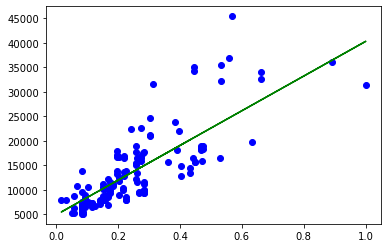

In [499]:
iterations = 5000
steps = 100
learning_rate = 0.02 #0.008
costsss = []

#original best-fit line
Y_pred = model.predict()
model.plot_best_fit(Y_pred, 'Initial Best Fit Line')

In [500]:
    for i in range(iterations):
        Y_pred = model.predict()
        cost = model.compute_cost(Y_pred)
        costsss.append(cost)
        model.update_coeffs(learning_rate)

In [501]:
print(costsss)

[374854274.69861925, 374457224.1158666, 374060594.0943104, 373664384.1884536, 373268593.953394, 372873222.94457686, 372478270.7179031, 372083736.8298552, 371689620.83725846, 371295922.2975283, 370902640.76852185, 370509775.80847055, 370117326.9760935, 369725293.8307997, 369333675.93210506, 368942472.84022707, 368551684.11583567, 368161309.3199872, 367771348.0142389, 367381799.7606682, 366992664.1217399, 366603940.6603939, 366215628.9400768, 365827728.52465135, 365440238.9784263, 365053159.8662425, 364666490.7533422, 364280231.20545876, 363894380.788796, 363508939.069979, 363123905.61606795, 362739279.9946744, 362355061.77379614, 361971250.52191025, 361587845.80800104, 361204847.2013843, 360822254.27192426, 360440066.58988845, 360058283.7261513, 359676905.25183815, 359295930.7385708, 358915359.75853837, 358535191.88435066, 358155426.68892944, 357776063.7458903, 357397102.628988, 357018542.91275513, 356640384.1719332, 356262625.9818163, 355885267.9181598, 355508309.5571498, 355131750.475

# accuracy

In [502]:
print("Current accuracy is :",model.get_current_accuracy(Y_pred))

Current accuracy is : 0.7659718808997352


C:\Users\ADHAM\AppData\Local\Temp\ipykernel_10936\3647367049.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


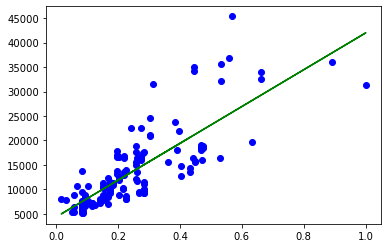

In [503]:

#final best-fit line
model.plot_best_fit(Y_pred, 'Final Best Fit Line')


In [504]:
itterations=[]
for i in range(iterations):
    itterations.append(i)

# plot to verify cost function decreases

C:\Users\ADHAM\AppData\Local\Temp\ipykernel_10936\279493508.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()


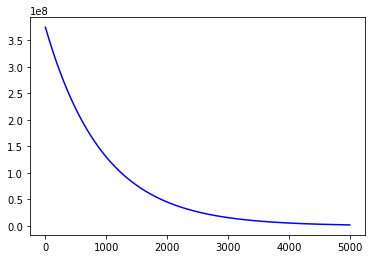

In [505]:

h = plt.figure('iterations vs cost')
plt.plot(itterations, costsss, color='b')
h.show()